<a href="https://colab.research.google.com/github/ronaldodeschain/rd_colab/blob/main/Alura_Care_Lidando_com_dados_de_multiplas_dimens%C3%B5es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
#arquivo no github
uri = "arquivo.csv"
resultados_exames = pd.read_csv(uri)
resultados_exames.head()

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,...,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,...,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,...,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678,0.854454


In [2]:
#treinar o modelo
from sklearn.model_selection import train_test_split
from numpy import random
SEED = 123143
random.seed(SEED)
#criação de variáveis
valores_exames = resultados_exames.drop(columns=['id','diagnostico'])
diagnostico = resultados_exames.diagnostico
valores_exames_v1 = valores_exames.drop(columns= 'exame_33')

treino_x,teste_x,treino_y,teste_y = train_test_split(valores_exames_v1,diagnostico,test_size=0.3)

In [3]:
treino_x.head()

,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,...,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32
268,12.87,16.21,82.38,103.78,512.2,0.09425,0.06219,0.03900,0.01615,0.2010,...,23.64,89.27,597.5,0.1256,0.1808,0.1992,0.786,0.0578,0.3604,0.07062
422,11.61,16.02,75.46,103.78,408.2,0.10880,0.11680,0.07097,0.04497,0.1886,...,19.67,81.93,475.7,0.1415,0.2170,0.2302,0.786,0.1105,0.2787,0.07427
168,17.47,24.68,116.10,103.78,984.6,0.10490,0.16030,0.21590,0.10430,0.1538,...,32.33,155.30,1660.0,0.1376,0.3830,0.4890,0.786,0.1721,0.2160,0.09300
501,13.82,24.49,92.33,103.78,595.9,0.11620,0.16810,0.13570,0.06759,0.2275,...,32.94,106.00,788.0,0.1794,0.3966,0.3381,0.786,0.1521,0.3651,0.11830
563,20.92,25.09,143.00,103.78,1347.0,0.10990,0.22360,0.31740,0.14740,0.2149,...,29.41,179.10,1819.0,0.1407,0.4186,0.6599,0.786,0.2542,0.2929,0.09873


In [4]:
treino_y.head()

268    B
422    B
168    M
501    M
563    M
Name: diagnostico, dtype: object

Vamos usar o Random Forest para este exercício

In [5]:
from sklearn.ensemble import RandomForestClassifier

classificador = RandomForestClassifier(n_estimators = 100)

In [6]:
#ajustar aos valores de treinamento
classificador.fit(treino_x,treino_y)
print("Resultado da classificação %.2f%%" % (classificador.score(teste_x,teste_y)*100))

Resultado da classificação 92.40%


In [9]:
#comparando com o dummy classifier
from sklearn.dummy import DummyClassifier
SEED = 123143
random.seed(SEED)
dummy = DummyClassifier(strategy = "most_frequent")
dummy.fit(treino_x,treino_y)
print("Resultado da classificação do Dummy %.2f%%" % (dummy.score(teste_x,teste_y)*100))


Resultado da classificação do Dummy 66.67%


AttributeError: ignored

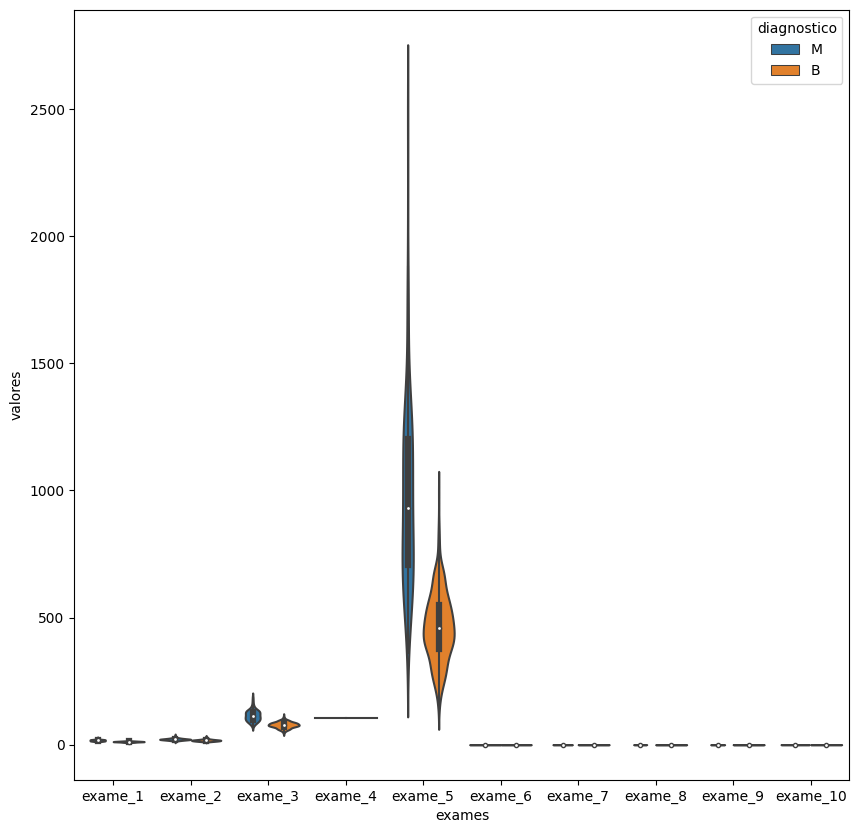

In [12]:
#visualização usando violinplot
import seaborn as sns
import matplotlib.pyplot as plt

#formatando para ter a exibição como desejamos
dados_plot = pd.concat([diagnostico,valores_exames_v1.iloc[:,0:10]],axis=1)
dados_plot = pd.melt(dados_plot, id_vars='diagnostico',
                     var_name='exames',
                     value_name='valores')
plt.figure(figsize=(10,10))
sns.violinplot(x= 'exames',y = 'valores',
               hue='diagnostico',data = dados_plot)
plt.xtics(rotation= 90)
